#PROPHET MODEL


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.

Here We have applied Prophet model with monthly seasonality on Warangal District at Mee-Seva univariate AQI data provided by NASSCOM.


In [1]:
## All necessary installations for the model to work
!pip install pystan~=2.14
!pip install fbprophet
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536760 sha256=b10bea6bf3de9345064b922af9088c0f33a8411826cb868288631eb578882255
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstan

In [97]:
## Included all necessary Header files
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import pandas as pd
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet

In [98]:
#Preprocessing the data

df = pd.read_excel("AQI1.xlsx")

df.index = pd.to_datetime(df["Month"])
df.drop(columns="Month",inplace=True)

df['Mee-Seva, Warangal'] = pd.to_numeric(df['Mee-Seva, Warangal'],errors='coerce')

# EDA

In [99]:
print(df.dtypes)
print(df.isna().sum())

Nizamabad             object
Adilabad              object
Kuda, warangal         int64
Mee-Seva, Warangal     int64
Khammam               object
Karimnagar             int64
dtype: object
Nizamabad             0
Adilabad              0
Kuda, warangal        0
Mee-Seva, Warangal    0
Khammam               0
Karimnagar            0
dtype: int64


<AxesSubplot:xlabel='Month'>

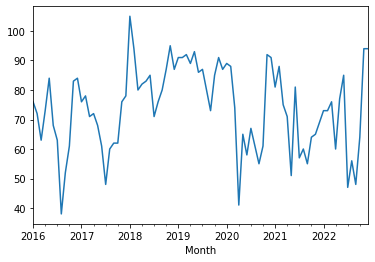

In [100]:
df["Mee-Seva, Warangal"].plot()

In [101]:
df['Mee-Seva, Warangal'] = df['Mee-Seva, Warangal'].interpolate(method="time")

<AxesSubplot:xlabel='Month'>

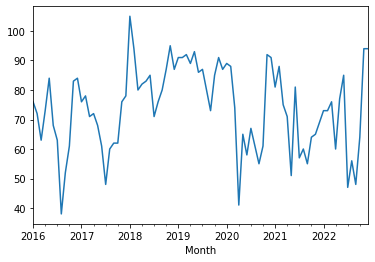

In [102]:
df["Mee-Seva, Warangal"].plot()

# MODEL

In [103]:
dfKN = df[["Mee-Seva, Warangal"]]
dfKN=dfKN.reset_index()
dfKN.rename(columns={'Month': 'ds', 'Mee-Seva, Warangal': 'y'}, inplace=True)

In [104]:
# Applying Prophet model 
model = Prophet(seasonality_mode="multiplicative")
model.fit(dfKN)
model.component_modes
future_dates=model.make_future_dataframe(periods=12,freq='M')
prediction = model.predict(future_dates)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


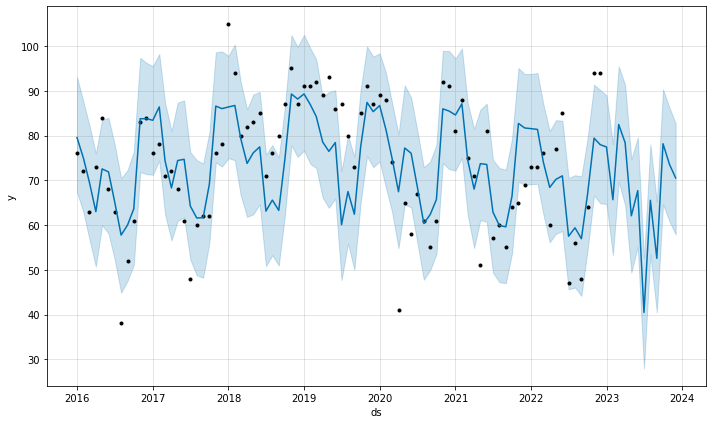

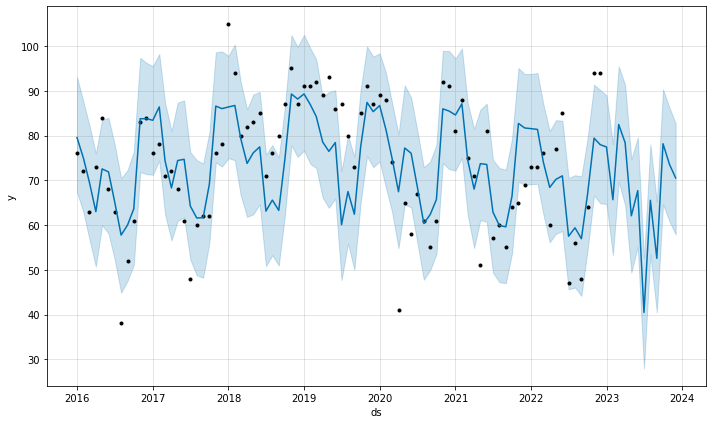

In [105]:
model.plot(prediction)

In [106]:
prediction.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
84,2022-12-31,67.450052,64.711465,88.972176,67.449215,67.453020,0.148172,0.148172,0.148172,0.148172,0.148172,0.148172,0.0,0.0,0.0,77.444276
85,2023-01-31,67.243560,53.274101,78.103741,67.228101,67.263344,-0.023500,-0.023500,-0.023500,-0.023500,-0.023500,-0.023500,0.0,0.0,0.0,65.663341
86,2023-02-28,67.057051,69.715754,95.456771,67.022174,67.099460,0.229771,0.229771,0.229771,0.229771,0.229771,0.229771,0.0,0.0,0.0,82.464817
87,2023-03-31,66.850560,64.441937,91.310227,66.794077,66.919605,0.172818,0.172818,0.172818,0.172818,0.172818,0.172818,0.0,0.0,0.0,78.403521
88,2023-04-30,66.650729,49.382612,74.677484,66.562260,66.748616,-0.068768,-0.068768,-0.068768,-0.068768,-0.068768,-0.068768,0.0,0.0,0.0,62.067292
89,2023-05-31,66.444237,55.175309,79.561560,66.320282,66.577133,0.018636,0.018636,0.018636,0.018636,0.018636,0.018636,0.0,0.0,0.0,67.682515
90,2023-06-30,66.244407,27.931940,52.609734,66.084991,66.404249,-0.389024,-0.389024,-0.389024,-0.389024,-0.389024,-0.389024,0.0,0.0,0.0,40.473728
91,2023-07-31,66.037915,53.456749,78.022060,65.842629,66.241671,-0.007772,-0.007772,-0.007772,-0.007772,-0.007772,-0.007772,0.0,0.0,0.0,65.524670
92,2023-08-31,65.831423,40.496391,65.133810,65.601883,66.079324,-0.201613,-0.201613,-0.201613,-0.201613,-0.201613,-0.201613,0.0,0.0,0.0,52.558925
93,2023-09-30,65.631593,64.643181,90.306668,65.358953,65.919701,0.190988,0.190988,0.190988,0.190988,0.190988,0.190988,0.0,0.0,0.0,78.166415


In [107]:
from pandas.tseries.offsets import DateOffset
pred_date=[df.index[-1]+ DateOffset(months=x)for x in range(1,13)]
pred_date=pd.DataFrame(index=pred_date,columns=df.columns)
data = pd.concat([df,pred_date])

<AxesSubplot:>

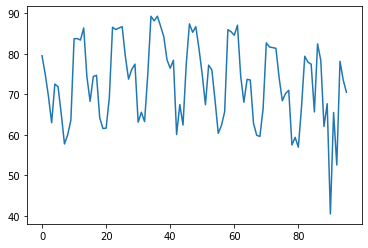

In [108]:
prediction["yhat"].plot()

<AxesSubplot:>

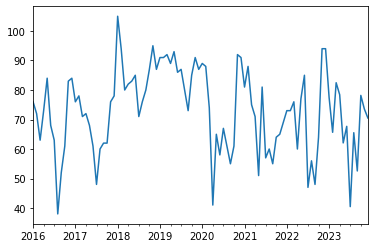

In [109]:
data["Mee-Seva, Warangal"][-12:]=prediction["yhat"][-12:]
data["Mee-Seva, Warangal"].plot()

# ERROR CALCULATION

In [110]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
rmse = round(sqrt(mean_squared_error(dfKN["y"].iloc[-12:], prediction["yhat"].iloc[72:84])),2)
mae = round(mean_absolute_error(dfKN["y"].iloc[-12:], prediction["yhat"].iloc[72:84]),2)
mape = mean_absolute_percentage_error(dfKN["y"].iloc[-12:], prediction["yhat"].iloc[72:84])
print(f"RMSE : {rmse}")
print(f"MAE  : {mae}")
print(f"MAPE : {mape*100}%")

RMSE : 9.75
MAE  : 8.71
MAPE : 12.44464213272069%


The mean absolute percentage error is : 12.44%
Hence our accuracy is : 87.56%
which is acceptable

In [111]:
df_final = data[["Mee-Seva, Warangal"]]
df_final.to_csv("Warangal_AQI.csv")